# Libraries

In [ ]:
pip install yellowbrick

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install currencyconverter


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install lightgbm==3.3.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import re
import datetime as dt
from currency_converter import CurrencyConverter
from catboost import CatBoostRegressor
import lightgbm as lgb
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.exceptions import ConvergenceWarning
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler
import sklearn.metrics
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn import model_selection, preprocessing, metrics
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt

In [ ]:
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", category=ConvergenceWarning)

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 500)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Reading the Data

In [ ]:
df = pd.read_csv("df_listings_stripped.csv")

# First Look at the Data

In [ ]:
def get_df_name(df):
    name =[x for x in globals() if globals()[x] is df][0]
    return name

In [ ]:
def general_info (dataframe):
    print('\033[1m' +f'{get_df_name(dataframe).upper()}'+'\033[0m')
    print("\n")
    print('\033[1m' +f" SHAPE ".center(30, '-')+'\033[0m')
    print(dataframe.shape,"\n")
    print('\033[1m' +f" VARIABLE TYPES ".center(30, '-')+'\033[0m')
    print(dataframe.info(),"\n")
    print('\033[1m' +f" NULL VALUE ".center(30, '-')+'\033[0m')
    print(dataframe.isnull().sum(),"\n")

In [ ]:
general_info(df)

DF


----------- SHAPE ------------
(245139, 51) 

------- VARIABLE TYPES -------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245139 entries, 0 to 245138
Data columns (total 51 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   host_response_time                            177111 non-null  object 
 1   host_response_rate                            177111 non-null  object 
 2   host_acceptance_rate                          189118 non-null  object 
 3   host_is_superhost                             245035 non-null  object 
 4   host_listings_count                           245099 non-null  float64
 5   host_total_listings_count                     245099 non-null  float64
 6   host_verifications                            245139 non-null  object 
 7   host_has_profile_pic                          245099 non-null  object 
 8   host_identity_verified                    

# Sampling 

In [ ]:
def city_sampler (dataframe, city, sample):
  df_city = dataframe[dataframe["city"] == city] 
  dataframe = dataframe[~(dataframe["city"] == city)]
  df_city = df_city.sample(sample,random_state=42)
  dataframe = pd.concat([dataframe,df_city],ignore_index=True)

  return dataframe

In [ ]:
df["city"].value_counts()

Paris         61365
Rome          24782
Madrid        20681
Barcelona     16920
Berlin        16680
Copenhagen    13815
Porto         11804
Vienna        11797
Florence      11138
Lyon          10934
Prague         7537
Amsterdam      6893
Munich         6627
Sevilla        6494
Brussels       6065
Oslo           5371
Stockholm      3990
Zurich         2246
Name: city, dtype: int64

In [ ]:
df = city_sampler(df, "Paris", 30000)

In [ ]:
df.reset_index(drop=True,inplace=True)

In [ ]:
df.shape

(213774, 51)

In [ ]:
df["price"].describe([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99])

count   213774.000
mean       148.376
std        517.371
min          0.000
10%         39.000
20%         54.000
30%         68.000
40%         80.000
50%         96.000
60%        115.000
70%        140.000
80%        180.000
90%        261.000
91%        276.000
92%        294.000
93%        309.000
94%        336.143
95%        364.000
96%        403.372
97%        475.000
98%        580.000
99%        859.000
max      91000.000
Name: price, dtype: float64

In [ ]:
df = df[(df["price"] > 0) & (df["price"] < 320)]

In [ ]:
df["price"].mean()

107.00669680386319

In [ ]:
df["price"].std()

65.42818695630969

In [ ]:
df.shape

(199557, 51)

# Correcting Features

In [ ]:
df.drop_duplicates(keep='first' ,inplace=True)

In [ ]:
df.shape

(199499, 51)

In [ ]:
def remove_percentage(dataframe,column):
  dataframe[col] = dataframe[col].apply(lambda x: x.replace("%", "") if pd.notnull(x) else x)
  dataframe[col] = dataframe[col].fillna("-1")
  dataframe[col] = dataframe[col].astype("int")
  dataframe.loc[dataframe[col] == -1, col] = np.nan 
  #dataframe[col] = dataframe[col].replace(-1, np.nan)

for col in ["host_response_rate","host_acceptance_rate"]:
  remove_percentage(df,col)

In [ ]:
df["property_type"] = df["property_type"].apply(lambda x: x.lower())

In [ ]:
property_list = ["rental unit", "condo", "loft", "apartment", "bed and breakfast", "boutique hotel", "townhouse", "vacation", "hostel", "villa",
                 "casa particular", "guest suite", "guesthouse", "aparthotel" ,"tiny home", "houseboat", "camper/rv", "cottage", "bungalow",
                 "floor", "lodge", "hut", "earthen", "tent", "minsu", "resort", "cabin", "chalet", "farm stay",
                 "pension", "barn", "castle", "tower", "cave", "tipi", "bus", "island", "treehouse", "ryokan", "heritage hotel", "in-law"
                 "ice dome", "lighthouse", "religious building", "kezhan", "trullo", "train", "container", "windmill", "in-law"]

In [ ]:
for row in property_list:
  df["property_type"] = df["property_type"].apply(lambda x: row if row in x else x)

In [ ]:
df.loc[(df["property_type"] == "entire home") | (df["property_type"] == "entire home/apt") | (df["property_type"] == "shared room in home") | (df["property_type"] == "private room in home"), "property_type"] = "home"

In [ ]:
df.loc[(df["property_type"] == "room in hotel") | (df["property_type"] == "shared room in hotel"), "property_type"] = "hotel"

In [ ]:
df.loc[(df["property_type"] == "private room") | (df["property_type"] == "shared room"), "property_type"] = "room"

In [ ]:
df.loc[(df["property_type"] == "boat") | (df["property_type"] == "private room in boat") | (df["property_type"] == "shared room in boat"), "property_type"] = "boat"

In [ ]:
df.loc[(df["property_type"] == "private room in dome") | (df["property_type"] == "shared room in dome"), "property_type"] = "dome"

In [ ]:
df.loc[(df["property_type"] == "private room in ice dome") | (df["property_type"] == "shared room in ice dome"), "property_type"] = "dome"

In [ ]:
df["property_type"] = df["property_type"].apply(lambda x: "hotel" if "hotel" in x else x)
df["property_type"] = df["property_type"].apply(lambda x: "hotel" if "hostel" in x else x)

In [ ]:
df["property_type"] = df["property_type"].apply(lambda x: "farm" if "farm" in x else x)

In [ ]:
df["property_type"].value_counts()

rental unit           139342
condo                  24538
home                    7697
hotel                   5112
loft                    5005
apartment               4796
bed and breakfast       3957
townhouse               2201
villa                   1113
vacation                 979
guest suite              964
guesthouse               897
casa particular          678
tiny home                333
boat                     295
room                     271
houseboat                270
camper/rv                141
entire place             136
cottage                  136
bungalow                 106
chalet                   103
farm                      80
cabin                     77
floor                     34
pension                   31
earthen                   29
lodge                     23
tent                      21
hut                       21
dome                      20
castle                    15
barn                      14
minsu                      8
tipi          

# Exploratory Data Analysis (EDA)

In [ ]:
def grab_col_names(dataframe, cat_th=10, car_th=135):

    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print('\033[1m'f"{get_df_name(dataframe).upper()}",'\033[0m' "\n")
    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car

In [ ]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)
print(f"\nNumerical Columns:{num_cols}\nCategorical Columns:{cat_cols}\nCardinal Columns:{cat_but_car}")

DF 

Observations: 199499
Variables: 51
cat_cols: 12
num_cols: 37
cat_but_car: 2
num_but_cat: 1

Numerical Columns:['host_response_rate', 'host_acceptance_rate', 'host_listings_count', 'host_total_listings_count', 'latitude', 'longitude', 'accommodates', 'bedrooms', 'beds', 'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms', 'reviews_per_mo

In [ ]:
def cat_summary(dataframe, col_name, plot=False):
  print('\033[1m' +f'{col_name.upper()}'.center(30, '-')+'\033[0m')
  print(pd.DataFrame({"Count": dataframe[col_name].value_counts(),
                      "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
  print("\n")
  if plot:
    sns.countplot(x=dataframe[col_name], data=dataframe)
    plt.show()
    #print("\n")

In [ ]:
for col in cat_cols:
    cat_summary(df, col)

------HOST_RESPONSE_TIME------
                     Count  Ratio
within an hour      100788 50.521
within a few hours   24335 12.198
within a day         17421  8.732
a few days or more    4326  2.168


------HOST_IS_SUPERHOST-------
    Count  Ratio
f  160878 80.641
t   38621 19.359


------HOST_VERIFICATIONS------
                                                   Count  Ratio
['email', 'phone']                                161013 80.709
['email', 'phone', 'work_email']                   22460 11.258
['phone']                                          14215  7.125
['phone', 'work_email']                              900  0.451
['email']                                            593  0.297
[]                                                   269  0.135
None                                                  34  0.017
['email', 'work_email']                               10  0.005
['email', 'phone', 'photographer']                     3  0.002
['work_email']                            

In [ ]:
def num_summary(dataframe, numerical_col, plot=False):
  print('\033[1m' +f'{numerical_col.upper()}'.center(30, '-')+'\033[0m')
  quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
  print(dataframe[numerical_col].describe(quantiles).T)
  print("\n")

  if plot:
        dataframe[numerical_col].hist(bins=50)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show(block=True)
        print("\n")

In [ ]:
for col in num_cols:
    num_summary(df, col)

------HOST_RESPONSE_RATE------
count   146870.000
mean        94.014
std         16.657
min          0.000
5%          63.000
10%         80.000
20%         94.000
30%        100.000
40%        100.000
50%        100.000
60%        100.000
70%        100.000
80%        100.000
90%        100.000
95%        100.000
99%        100.000
max        100.000
Name: host_response_rate, dtype: float64


-----HOST_ACCEPTANCE_RATE-----
count   157197.000
mean        84.049
std         26.198
min          0.000
5%          20.000
10%         44.000
20%         69.000
30%         86.000
40%         94.000
50%         98.000
60%        100.000
70%        100.000
80%        100.000
90%        100.000
95%        100.000
99%        100.000
max        100.000
Name: host_acceptance_rate, dtype: float64


-----HOST_LISTINGS_COUNT------
count   199465.000
mean        15.674
std         69.445
min          0.000
5%           1.000
10%          1.000
20%          1.000
30%          1.000
40%          1.000
50

In [ ]:
def target_summary_with_cat(dataframe, target, categorical_col):
        print(pd.DataFrame({"TARGET_MEAN": dataframe.groupby(categorical_col)[target].mean()}), end="\n\n\n")

In [ ]:
for col in cat_cols:
    target_summary_with_cat(df, "price", col)

                    TARGET_MEAN
host_response_time             
a few days or more      105.902
within a day            112.648
within a few hours      108.066
within an hour          117.505


                   TARGET_MEAN
host_is_superhost             
f                      105.503
t                      112.893


                                                  TARGET_MEAN
host_verifications                                           
None                                                   73.690
['email', 'phone', 'photographer', 'work_email']       54.000
['email', 'phone', 'photographer']                    153.381
['email', 'phone', 'work_email']                      122.728
['email', 'phone']                                    104.896
['email', 'work_email']                               134.452
['email']                                             115.361
['phone', 'work_email']                               145.603
['phone']                                             101.86

In [ ]:
def correlation_matrix(df, cols):
    fig = plt.gcf()
    fig.set_size_inches(30, 24)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    fig = sns.heatmap(df[cols].corr(), annot=True, linewidths=0.5, annot_kws={'size': 12}, linecolor='w', cmap='RdBu')
    plt.show(block=True)

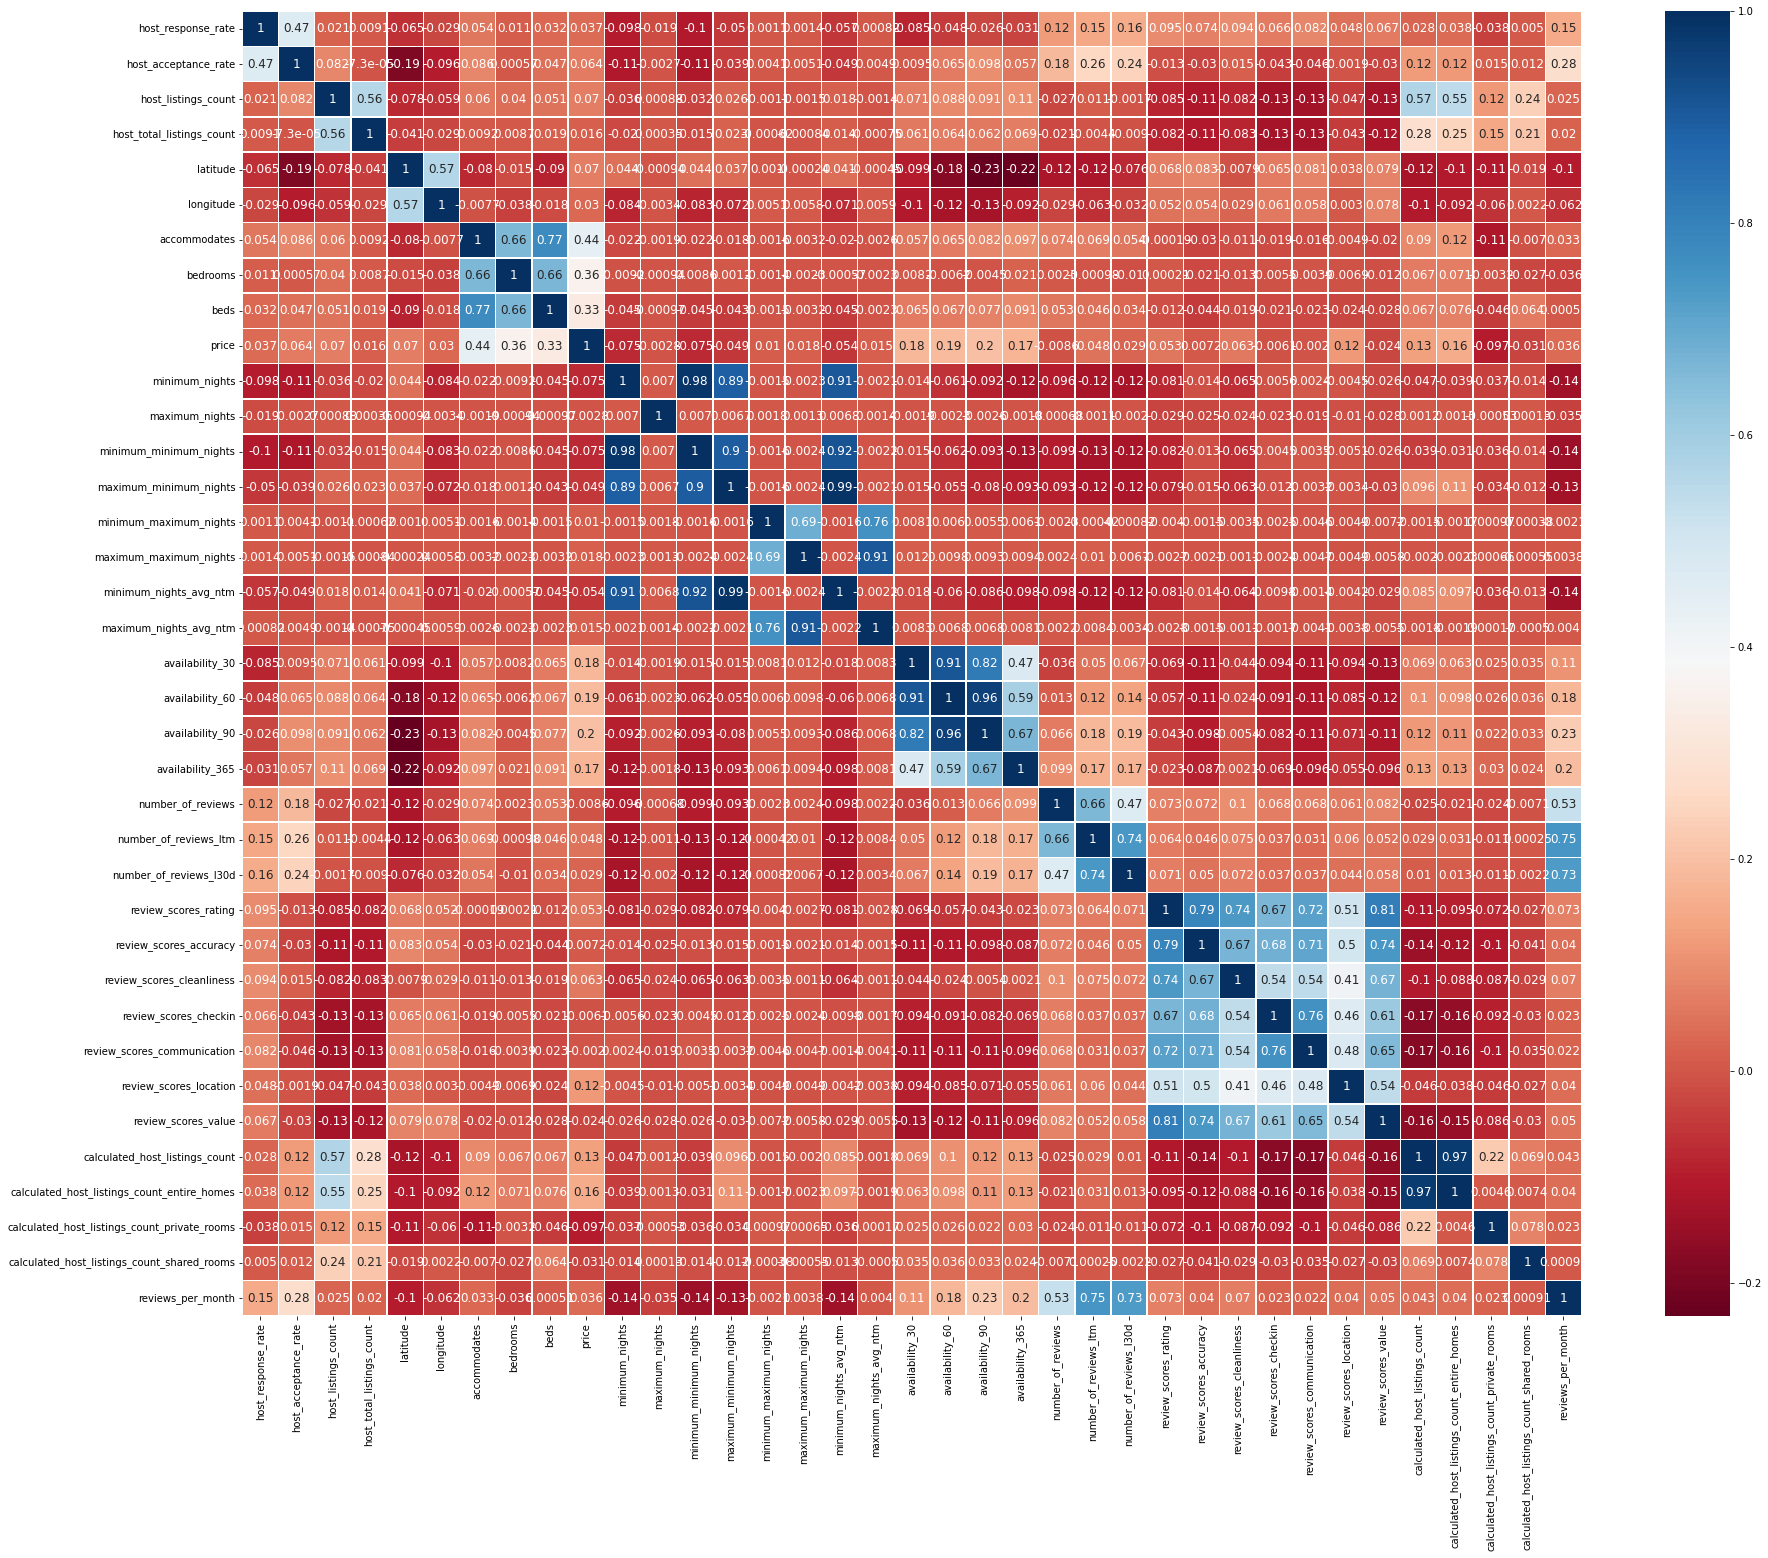

In [ ]:
correlation_matrix(df, num_cols)

# Base Model

In [ ]:
df_base = df.copy()

In [ ]:
df_base.drop(["bathrooms","amenities","host_verifications"], axis=1, inplace=True)

In [ ]:
df_base.isnull().sum()

host_response_time                              68028
host_response_rate                              68028
host_acceptance_rate                            56021
host_is_superhost                                 104
host_listings_count                                40
host_total_listings_count                          40
host_has_profile_pic                               40
host_identity_verified                             40
neighbourhood_cleansed                              0
latitude                                            0
longitude                                           0
property_type                                       0
room_type                                           0
accommodates                                        0
bathrooms_text                                    376
bedrooms                                        21831
beds                                             3681
price                                               0
minimum_nights              

In [ ]:
df_base.dropna(inplace=True)

In [ ]:
df_base.shape

(138465, 48)

In [ ]:
def grab_col_names(dataframe, cat_th=10, car_th=20):

    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print('\033[1m'f"{get_df_name(dataframe).upper()}",'\033[0m' "\n")
    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car

In [ ]:
cat_cols, num_cols, cat_but_car = grab_col_names(df_base,car_th=1000)
print(f"\nNumerical Columns:{num_cols}\nCategorical Columns:{cat_cols}\nCardinal Columns:{cat_but_car}")

DF_BASE 

Observations: 138465
Variables: 48
cat_cols: 13
num_cols: 35
cat_but_car: 0
num_but_cat: 0

Numerical Columns:['host_listings_count', 'host_total_listings_count', 'latitude', 'longitude', 'accommodates', 'bedrooms', 'beds', 'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms', 'reviews_per_month']
Categorical Columns:['host_response

In [ ]:
binary_cols = [col for col in df_base.columns if df_base[col].dtypes == "O" and len(df_base[col].unique()) == 2]

In [ ]:
binary_cols

['host_is_superhost',
 'host_has_profile_pic',
 'host_identity_verified',
 'has_availability',
 'instant_bookable']

In [ ]:
def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe
    
for col in binary_cols:
    label_encoder(df_base, col)

In [ ]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

df_base = one_hot_encoder(df_base, cat_cols, drop_first=True)

In [ ]:
y = df_base["price"]
X = df_base.drop(["price"], axis=1)

In [ ]:
import re
X = X.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

In [ ]:
#lgbm = LGBMRegressor(random_state=42)
#catboost = CatBoostRegressor(random_state=42)
#lr = LinearRegression()
#knn = KNeighborsRegressor()
#cart = DecisionTreeRegressor()
#rf = RandomForestRegressor()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=42)

In [ ]:
#lgbm = LGBMRegressor(random_state=42).fit(X_train, y_train)
#catboost = CatBoostRegressor(random_state=42).fit(X_train, y_train)
#lr = LinearRegression().fit(X_train, y_train)
#knn = KNeighborsRegressor().fit(X_train, y_train)
#cart = DecisionTreeRegressor().fit(X_train, y_train)
#rf = RandomForestRegressor().fit(X_train, y_train)

In [ ]:
#y_pred = lgbm.predict(X_test)
#y_pred = catboost.predict(X_test)
#y_pred = lr.predict(X_test)
#y_pred = knn.predict(X_test)
#y_pred = cart.predict(X_test)
#y_pred = rf.predict(X_test)

In [ ]:
print("R2:",r2_score(y_test, y_pred))
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred)))

R2: 0.32969981954891303
RMSE: 171.56113360352018


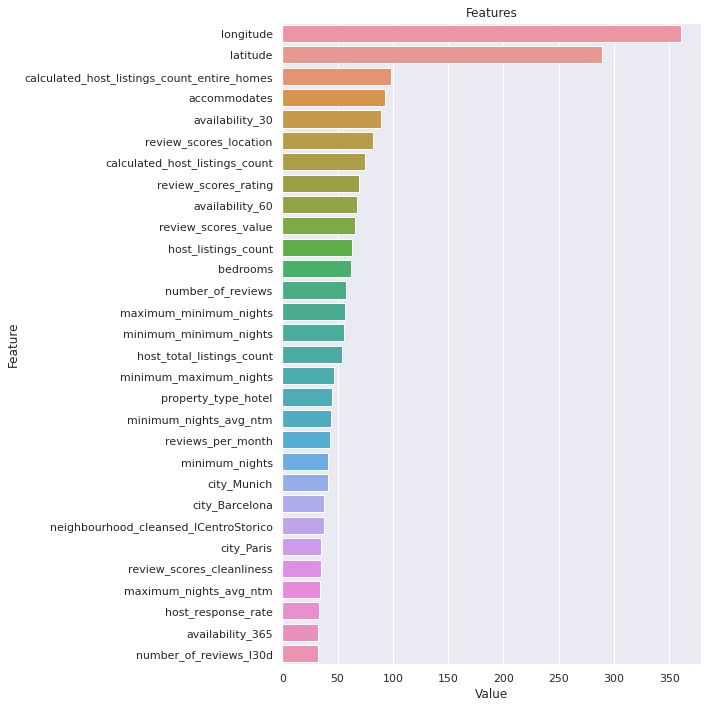

In [ ]:
def plot_importance(model, features, num=30, save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                      ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')


plot_importance(lgbm, X)

# Filling NA Values

In [ ]:
drop_list = ["host_response_time","host_is_superhost","host_verifications","host_has_profile_pic", "host_identity_verified", "has_availability"]
df.drop(drop_list, axis=1, inplace=True)

In [ ]:
df.isnull().sum()

host_response_rate                               52629
host_acceptance_rate                             42302
host_listings_count                                 34
host_total_listings_count                           34
neighbourhood_cleansed                               0
latitude                                             0
longitude                                            0
property_type                                        0
room_type                                            0
accommodates                                         0
bathrooms                                       199499
bathrooms_text                                     190
bedrooms                                         16213
beds                                              2848
amenities                                            0
price                                                0
minimum_nights                                       0
maximum_nights                                       0
minimum_mi

In [ ]:
df['host_response_rate'] = df['host_response_rate'].fillna(df['host_response_rate'].median())

In [ ]:
df['host_acceptance_rate'] = df['host_acceptance_rate'].fillna(df['host_acceptance_rate'].median())

In [ ]:
df['host_listings_count'] = df['host_listings_count'].fillna(df['host_listings_count'].median())

In [ ]:
df['host_total_listings_count'] = df['host_total_listings_count'].fillna(df['host_total_listings_count'].median())

In [ ]:
for i in ['minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm']:
    df[i] = df[i].fillna(df[i].median()) 

In [ ]:
for i in ['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']:
    df[i] = df[i].fillna(df[i].mean()) 

In [ ]:
df['reviews_per_month'] = df['reviews_per_month'].fillna(df['reviews_per_month'].median())

# Filling Bedroom Data

In [ ]:
grouped = df.groupby(['property_type', 'room_type'])
mean_bedrooms = grouped['bedrooms'].transform('median')
df['bedrooms'] = df['bedrooms'].fillna(mean_bedrooms)

In [ ]:
grouped = df.groupby(['property_type', 'room_type'])
mean_beds = grouped['beds'].transform('median')
df['beds'] = df['beds'].fillna(mean_beds)

In [ ]:
df.isnull().sum()

host_response_rate                                   0
host_acceptance_rate                                 0
host_listings_count                                  0
host_total_listings_count                            0
neighbourhood_cleansed                               0
latitude                                             0
longitude                                            0
property_type                                        0
room_type                                            0
accommodates                                         0
bathrooms                                       199499
bathrooms_text                                     190
bedrooms                                             0
beds                                                 0
amenities                                            0
price                                                0
minimum_nights                                       0
maximum_nights                                       0
minimum_mi

In [ ]:
df.loc[df["bedrooms"].isnull(),"bedrooms"] = 1

In [ ]:
df.loc[df["beds"].isnull(),"beds"] = 2

In [ ]:
df.isnull().sum()

host_response_rate                                   0
host_acceptance_rate                                 0
host_listings_count                                  0
host_total_listings_count                            0
neighbourhood_cleansed                               0
latitude                                             0
longitude                                            0
property_type                                        0
room_type                                            0
accommodates                                         0
bathrooms                                       199499
bathrooms_text                                     190
bedrooms                                             0
beds                                                 0
amenities                                            0
price                                                0
minimum_nights                                       0
maximum_nights                                       0
minimum_mi

# Filling Bathroom Data

In [ ]:
def extract_number(text):
  if text is None or pd.isnull(text):
    return text
  else:
    number = (text.split(" ")[0])
    try:
      return float(number)
    except ValueError:
      return 0.5

In [ ]:
df['bathrooms'] = df['bathrooms_text'].apply(extract_number)

In [ ]:
bath_amenities = ["hair dryer","shampoo","body soap","hot water", "shower gel","conditioner","bidet","shower","hot tub"]

In [ ]:
import ast

df["amenities"] = df["amenities"].apply(lambda x: x.lower())
df["amenities"] = df["amenities"].apply(lambda x: ast.literal_eval(x))

In [ ]:
for index, value in df.loc[df["bathrooms_text"].isna(),"amenities"].iteritems():
    result = any(item in value for item in bath_amenities)
    if result == True:
       df.loc[index, 'bathrooms'] = 1
    else:
        df.loc[index, 'bathrooms'] = 0

In [ ]:
def check_shared(string):
    if 'shared' in string:
        return 'shared'
    else:
        return 'private'

df['bathrooms_type'] = df[pd.notnull(df['bathrooms_text'])]['bathrooms_text'].apply(check_shared)

In [ ]:
df['bathrooms_type'] = df['bathrooms_type'].fillna(df['bathrooms_type'].mode()[0])


In [ ]:
df.drop("bathrooms_text",axis=1,inplace=True)

In [ ]:
df.isnull().sum()

host_response_rate                              0
host_acceptance_rate                            0
host_listings_count                             0
host_total_listings_count                       0
neighbourhood_cleansed                          0
latitude                                        0
longitude                                       0
property_type                                   0
room_type                                       0
accommodates                                    0
bathrooms                                       0
bedrooms                                        0
beds                                            0
amenities                                       0
price                                           0
minimum_nights                                  0
maximum_nights                                  0
minimum_minimum_nights                          0
maximum_minimum_nights                          0
minimum_maximum_nights                          0


# Outlier Analysis

In [ ]:
def outlier_thresholds(dataframe, col_name, q1=0.01, q3=0.99):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [ ]:
def check_outlier(dataframe, col_name, q1=0.01, q3=0.99):
    print("\n")
    print('\033[1m' +f'{col_name.upper()}'.center(30, '-')+'\033[0m')
    print(f"Max Value = {dataframe[col_name].max()}, Min Value = {dataframe[col_name].min()}")
    low_limit, up_limit = outlier_thresholds(dataframe, col_name, q1, q3)
    print(f"Lower limit = {low_limit}, Upper limit = {up_limit}")
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [ ]:
for col in num_cols:
    print(check_outlier(df,col))



------HOST_RESPONSE_RATE------
Max Value = 100.0, Min Value = 0.0
Lower limit = -150.0, Upper limit = 250.0
False


-----HOST_ACCEPTANCE_RATE-----
Max Value = 100.0, Min Value = 0.0
Lower limit = -150.0, Upper limit = 250.0
False


-----HOST_LISTINGS_COUNT------
Max Value = 1732.0, Min Value = 0.0
Lower limit = -392.0, Upper limit = 656.0
True


--HOST_TOTAL_LISTINGS_COUNT---
Max Value = 12017.0, Min Value = 0.0
Lower limit = -567.5, Upper limit = 948.5
True


-----------LATITUDE-----------
Max Value = 60.03894, Min Value = 37.31020112444731
Lower limit = 3.5788247600000034, Upper limit = 93.73478539999999
False


----------LONGITUDE-----------
Max Value = 18.2114718, Min Value = -8.78297
Lower limit = -48.64218794, Upper limit = 58.04862949999999
False


---------ACCOMMODATES---------
Max Value = 16, Min Value = 1
Lower limit = -9.5, Upper limit = 18.5
False


-----------BEDROOMS-----------
Max Value = 50.0, Min Value = 1.0
Lower limit = -3.5, Upper limit = 8.5
True


-------------B

In [ ]:
len(num_cols)

37

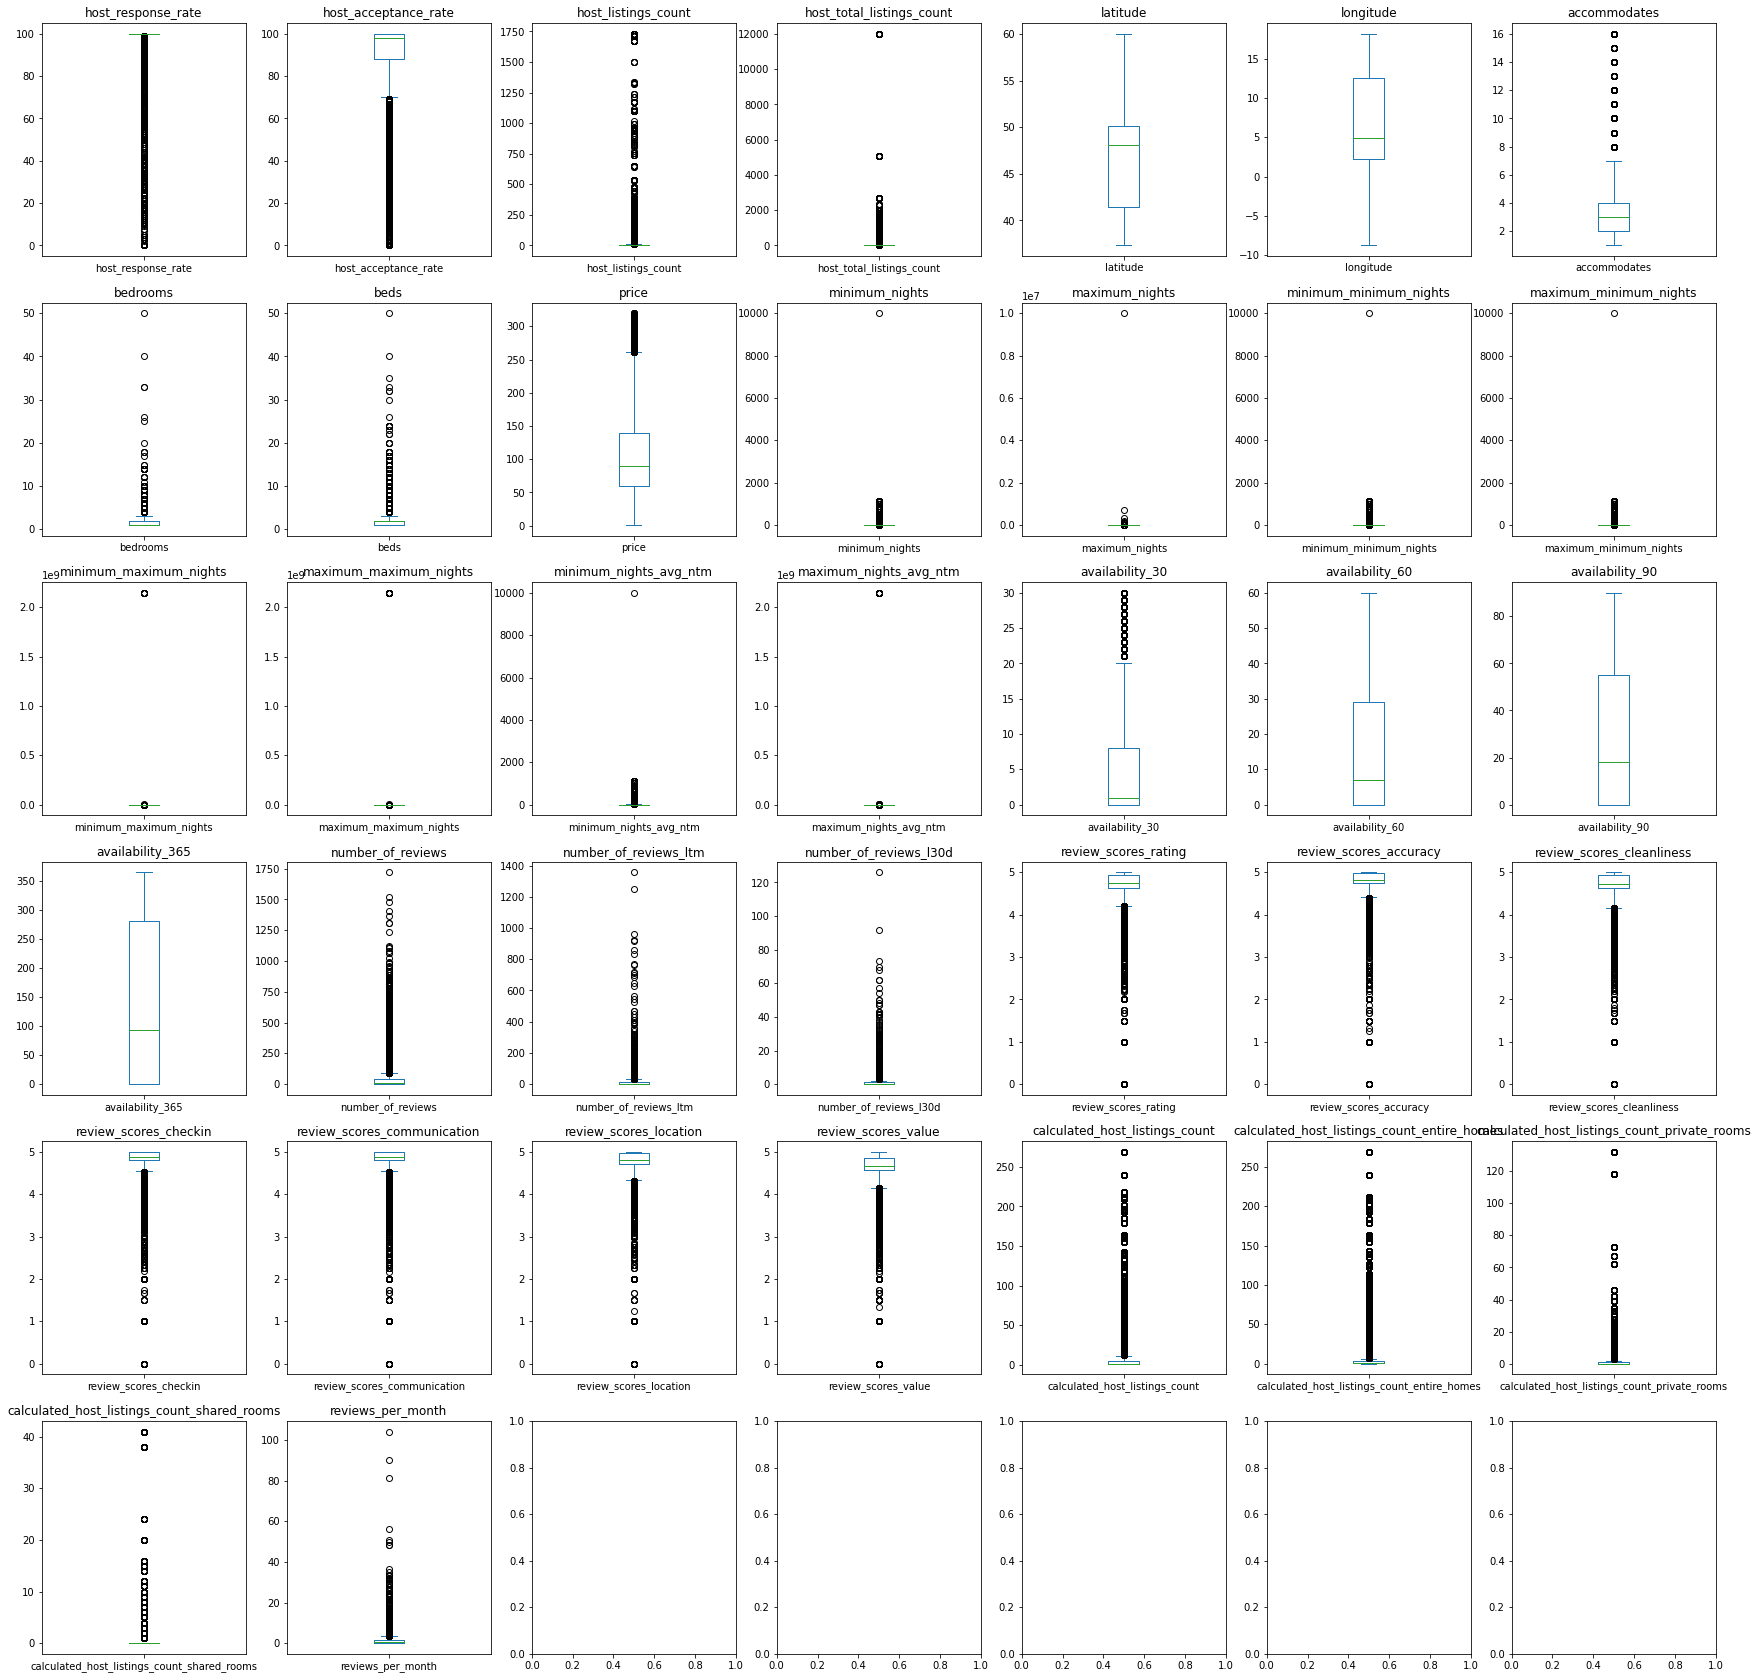

In [ ]:
fig, axs = plt.subplots(6, 7, figsize=(30,30), sharey=False)
for i, j in enumerate(num_cols):
  row = i // 7
  col = i % 7
  df[j].plot(kind='box', ax=axs[row, col])
  axs[row, col].set_title(j)

plt.show()

In [ ]:
print(df[df["host_total_listings_count"] > 2500].shape)
print(df[df["bedrooms"] > 30].shape)
print(df[df["bathrooms"] > 30].shape)
print(df[df["beds"] > 40].shape)
#print(df[df["number_of_reviews"] > 2000].shape)
print(df[df["number_of_reviews_ltm"] > 1000].shape)
print(df[df["number_of_reviews_l30d"] > 80].shape)
print(df[df["calculated_host_listings_count"] > 250].shape)
print(df[df["calculated_host_listings_count_entire_homes"] > 250].shape)
print(df[df["calculated_host_listings_count_private_rooms"] > 80].shape)
print(df[df["calculated_host_listings_count_shared_rooms"] > 25].shape)
print(df[df["reviews_per_month"] > 60].shape)

(179, 45)
(4, 45)
(1, 45)
(1, 45)
(2, 45)
(2, 45)
(139, 45)
(139, 45)
(250, 45)
(136, 45)
(3, 45)


In [ ]:
df = df[df["host_total_listings_count"] <= 2500]
df = df[df["bedrooms"] <= 30]
df = df[df["beds"] <= 40]
df = df[df["number_of_reviews"] <= 2000]
df = df[df["number_of_reviews_ltm"] <= 1000]
df = df[df["number_of_reviews_l30d"] <= 80]
df = df[df["calculated_host_listings_count"] <= 250]
df = df[df["calculated_host_listings_count_entire_homes"] <= 250]
df = df[df["calculated_host_listings_count_private_rooms"] <= 80]
df = df[df["calculated_host_listings_count_shared_rooms"] <= 25]
df = df[df["reviews_per_month"] <= 60]

In [ ]:
df[['minimum_nights',
 'maximum_nights',
 'minimum_minimum_nights',
 'maximum_minimum_nights',
 'minimum_maximum_nights',
 'maximum_maximum_nights',
 'minimum_nights_avg_ntm',
 'maximum_nights_avg_ntm']].describe([0.50,0.51,0.52,0.53,0.54,0.55,0.60,0.70, 0.75,0.80,0.85,0.90,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99]).T

,count,mean,std,min,50%,51%,52%,53%,54%,55%,60%,70%,75%,80%,85%,90%,91%,92%,93%,94%,95%,96%,97%,98%,99%,max
minimum_nights,198873.000,22.100,80.426,1.000,2.000,2.000,2.000,2.000,2.000,2.000,3.000,3.000,4.000,5.000,7.000,30.000,30.000,31.000,32.000,60.000,92.000,365.000,365.000,365.000,365.000,9999.000
maximum_nights,198873.000,653.590,22509.893,1.000,365.000,365.000,365.000,365.000,500.000,1124.000,1125.000,1125.000,1125.000,1125.000,1125.000,1125.000,1125.000,1125.000,1125.000,1125.000,1125.000,1125.000,1125.000,1125.000,1125.000,10000000.000
minimum_minimum_nights,198873.000,21.801,80.162,1.000,2.000,2.000,2.000,2.000,2.000,2.000,3.000,3.000,4.000,5.000,7.000,30.000,30.000,31.000,32.000,56.000,92.000,365.000,365.000,365.000,365.000,9999.000
maximum_minimum_nights,198873.000,24.742,87.611,1.000,3.000,3.000,3.000,3.000,3.000,3.000,3.000,4.000,5.000,6.000,10.000,30.000,31.000,32.000,33.000,90.000,123.400,365.000,365.000,365.000,365.000,9999.000
minimum_maximum_nights,198873.000,87144.264,13620082.641,1.000,1125.000,1125.000,1125.000,1125.000,1125.000,1125.000,1125.000,1125.000,1125.000,1125.000,1125.000,1125.000,1125.000,1125.000,1125.000,1125.000,1125.000,1125.000,1125.000,1125.000,1125.000,2147483647.000
maximum_maximum_nights,198873.000,184373.799,19854047.618,1.000,1125.000,1125.000,1125.000,1125.000,1125.000,1125.000,1125.000,1125.000,1125.000,1125.000,1125.000,1125.000,1125.000,1125.000,1125.000,1125.000,1125.000,1125.000,1125.000,1125.000,1125.000,2147483647.000
minimum_nights_avg_ntm,198873.000,23.849,86.121,1.000,2.100,2.200,2.400,2.700,3.000,3.000,3.000,3.700,4.000,5.000,8.000,30.000,30.000,31.000,32.000,62.000,120.000,365.000,365.000,365.000,365.000,9999.000
maximum_nights_avg_ntm,198873.000,151882.877,17999943.822,1.000,1125.000,1125.000,1125.000,1125.000,1125.000,1125.000,1125.000,1125.000,1125.000,1125.000,1125.000,1125.000,1125.000,1125.000,1125.000,1125.000,1125.000,1125.000,1125.000,1125.000,1125.000,2147483647.000


In [ ]:
for i in ['minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm']:
    print(df.loc[df[i] > df[i].quantile(0.99)].shape)

(113, 45)
(49, 45)
(126, 45)
(568, 45)
(62, 45)
(122, 45)
(539, 45)
(122, 45)


In [ ]:
for i in ['minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm']:
    df.loc[df[i] > df[i].quantile(0.99), i] = df[i].quantile(0.99) 

In [ ]:
for col in num_cols:
    print(check_outlier(df,col))



------HOST_RESPONSE_RATE------
Max Value = 100.0, Min Value = 0.0
Lower limit = -150.0, Upper limit = 250.0
False


-----HOST_ACCEPTANCE_RATE-----
Max Value = 100.0, Min Value = 0.0
Lower limit = -150.0, Upper limit = 250.0
False


-----HOST_LISTINGS_COUNT------
Max Value = 1732.0, Min Value = 0.0
Lower limit = -360.5, Upper limit = 603.5
True


--HOST_TOTAL_LISTINGS_COUNT---
Max Value = 2344.0, Min Value = 0.0
Lower limit = -512.0, Upper limit = 856.0
True


-----------LATITUDE-----------
Max Value = 60.03894, Min Value = 37.31020112444731
Lower limit = 3.5787508000000017, Upper limit = 93.734882
False


----------LONGITUDE-----------
Max Value = 18.2114718, Min Value = -8.78297
Lower limit = -48.6426918, Upper limit = 58.04876899999999
False


---------ACCOMMODATES---------
Max Value = 16, Min Value = 1
Lower limit = -9.5, Upper limit = 18.5
False


-----------BEDROOMS-----------
Max Value = 26.0, Min Value = 1.0
Lower limit = -3.5, Upper limit = 8.5
True


-------------BEDS-------

In [ ]:
df.shape

(198873, 45)

# Model (No New Features)

In [ ]:
model = df.copy()

In [ ]:
model.drop("amenities", axis=1, inplace=True)

In [ ]:
model.isnull().sum()

host_response_rate                              0
host_acceptance_rate                            0
host_listings_count                             0
host_total_listings_count                       0
neighbourhood_cleansed                          0
latitude                                        0
longitude                                       0
property_type                                   0
room_type                                       0
accommodates                                    0
bathrooms                                       0
bedrooms                                        0
beds                                            0
price                                           0
minimum_nights                                  0
maximum_nights                                  0
minimum_minimum_nights                          0
maximum_minimum_nights                          0
minimum_maximum_nights                          0
maximum_maximum_nights                          0


In [ ]:
model.shape

(198873, 44)

In [ ]:
model.head()

,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,city,bathrooms_type
0,100.000,100.000,1.000,1.000,Oostelijk Havengebied - Indische Buurt,52.364,4.944,rental unit,Private room,2,1.500,1.000,2.000,49.000,3,28,3.000,3.000,1125.000,1125.000,3.000,1125.000,1,9,14,14,305,25,1,4.890,4.940,5.000,4.970,4.980,4.690,4.820,t,1,0,1,0,1.860,Amsterdam,shared
1,100.000,98.000,5.000,5.000,Centrum-Oost,52.364,4.894,townhouse,Private room,2,1.000,1.000,1.000,106.000,1,365,1.000,1.000,1125.000,1125.000,1.000,1125.000,0,0,0,0,339,0,0,4.440,4.690,4.790,4.630,4.620,4.870,4.490,t,2,0,2,0,2.220,Amsterdam,private
2,100.000,100.000,1.000,1.000,Centrum-West,52.388,4.892,houseboat,Private room,2,1.500,1.000,1.000,136.000,2,356,2.000,2.000,1125.000,1125.000,2.000,1125.000,0,0,14,121,231,8,0,4.940,4.920,4.950,4.950,4.920,4.890,4.790,t,1,0,1,0,1.780,Amsterdam,private
3,100.000,100.000,2.000,2.000,Centrum-West,52.368,4.891,rental unit,Private room,2,1.000,1.000,1.000,75.000,2,1125,2.000,2.000,1125.000,1125.000,2.000,1125.000,4,6,8,117,428,75,5,4.880,4.940,4.890,4.960,4.940,4.960,4.830,f,2,0,2,0,2.920,Amsterdam,shared
4,100.000,100.000,2.000,2.000,Centrum-Oost,52.366,4.891,rental unit,Private room,1,1.000,1.000,1.000,55.000,2,730,2.000,2.000,730.000,730.000,2.000,730.000,0,4,5,160,582,86,7,4.790,4.880,4.840,4.920,4.920,4.870,4.770,f,2,0,2,0,4.160,Amsterdam,shared


In [ ]:
def grab_col_names(dataframe, cat_th=10, car_th=20):

    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print('\033[1m'f"{get_df_name(dataframe).upper()}",'\033[0m' "\n")
    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car

In [ ]:
cat_cols, num_cols, cat_but_car = grab_col_names(model,car_th=1000)
print(f"\nNumerical Columns:{num_cols}\nCategorical Columns:{cat_cols}\nCardinal Columns:{cat_but_car}")

MODEL 

Observations: 198873
Variables: 44
cat_cols: 6
num_cols: 38
cat_but_car: 0
num_but_cat: 0

Numerical Columns:['host_response_rate', 'host_acceptance_rate', 'host_listings_count', 'host_total_listings_count', 'latitude', 'longitude', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms', 

In [ ]:
binary_cols = [col for col in model.columns if model[col].dtypes == "O" and len(model[col].unique()) == 2]

In [ ]:
binary_cols

['instant_bookable', 'bathrooms_type']

In [ ]:
def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe
    
for col in binary_cols:
    label_encoder(model, col)

In [ ]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

model = one_hot_encoder(model, cat_cols, drop_first=True)

In [ ]:
y = model["price"]
X = model.drop(["price"], axis=1)

In [ ]:
import re
X = X.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

In [ ]:
#lgbm = LGBMRegressor(random_state=42) 
catboost = CatBoostRegressor(random_state=42)
#lr = LinearRegression()
#knn = KNeighborsRegressor()
#cart = DecisionTreeRegressor()
#rf = RandomForestRegressor()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=42)

In [ ]:
lgbm = LGBMRegressor(random_state=42).fit(X_train, y_train)
#catboost = CatBoostRegressor(random_state=42).fit(X_train, y_train)

In [ ]:
y_pred = lgbm.predict(X_test)
#y_pred = catboost.predict(X_test))

In [ ]:
print("R2:",r2_score(y_test, y_pred))
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred)))

R2: 0.6325294728066913
RMSE: 39.68732695704753


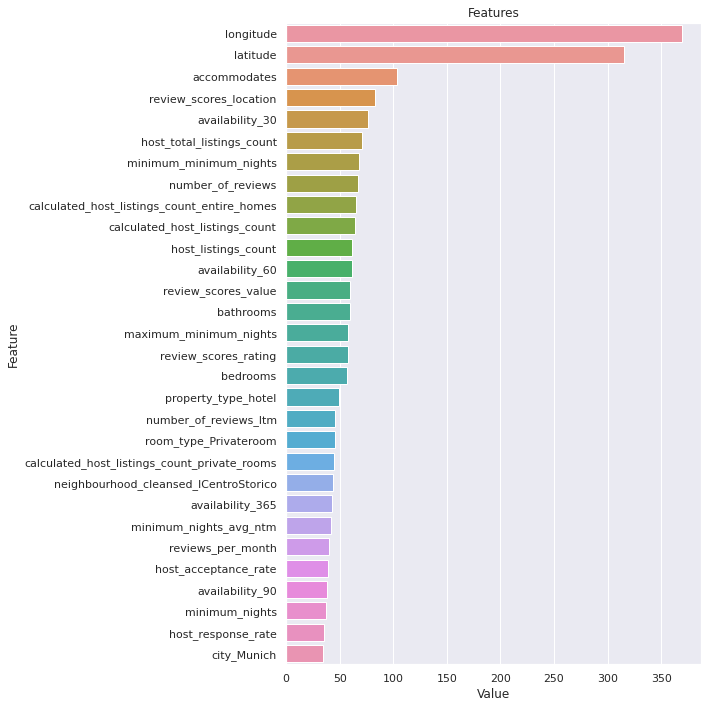

In [ ]:
def plot_importance(model, features, num=30, save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                      ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')


plot_importance(lgbm, X)

# Distance from City Centre Calculations

In [ ]:
city_centers = pd.read_csv("city_center.csv")

In [ ]:
df.reset_index(drop=True,inplace=True)

In [ ]:
city_centers.head()

,city,lat,lon
0,Copenhagen,55.676,12.566
1,Amsterdam,52.374,4.890
2,Barcelona,41.389,2.159
3,Lyon,45.748,4.847
4,Oslo,59.913,10.746


In [ ]:
df_merged = pd.merge(df, city_centers, on='city',how="left")

In [ ]:
df_merged.shape

(198873, 47)

In [ ]:
df_merged.isnull().sum()

host_response_rate                              0
host_acceptance_rate                            0
host_listings_count                             0
host_total_listings_count                       0
neighbourhood_cleansed                          0
latitude                                        0
longitude                                       0
property_type                                   0
room_type                                       0
accommodates                                    0
bathrooms                                       0
bedrooms                                        0
beds                                            0
amenities                                       0
price                                           0
minimum_nights                                  0
maximum_nights                                  0
minimum_minimum_nights                          0
maximum_minimum_nights                          0
minimum_maximum_nights                          0


In [ ]:
from math import radians, degrees, sin, cos, asin, acos, sqrt
def great_circle(lon1, lat1, lon2, lat2):
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    return 6371 * (
        acos(sin(lat1) * sin(lat2) + cos(lat1) * cos(lat2) * cos(lon1 - lon2))
    )


In [ ]:
df_merged['center_distance'] = df_merged.apply(lambda row: great_circle(row['longitude'], row['latitude'], row['lon'], row['lat']),axis=1)

In [ ]:
df['NEW_center_distance'] = df_merged['center_distance']


In [ ]:
df['NEW_center_distance'].describe([0.50,0.51,0.52,0.53,0.54,0.55,0.60,0.70, 0.75,0.80,0.85,0.90,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99]).T

count   198873.000
mean        66.574
std        254.127
min          0.000
50%          2.754
51%          2.818
52%          2.880
53%          2.945
54%          3.013
55%          3.083
60%          3.417
70%          4.190
75%          4.697
80%          5.358
85%          6.439
90%          8.946
91%         10.301
92%         12.740
93%         19.024
94%         30.813
95%       1087.075
96%       1088.222
97%       1089.236
98%       1090.378
99%       1091.539
max       1103.852
Name: NEW_center_distance, dtype: float64

0-1 çok yakın 
1-2 yakın
2-4 biraz yakın
4-8 orta
8-15 biraz uzak
15-30 uzak
30 > çok uzak 

In [ ]:
bins = [-1, 1, 2, 4, 8, 15,30, 1200]
category = ['cok yakin', 'yakin', 'biraz yakin', "orta", "biraz uzak", "uzak", "cok uzak"]
df['NEW_center_distance_cat'] = pd.cut(df['NEW_center_distance'], bins, labels = category)

In [ ]:
df['NEW_center_distance_cat'].value_counts()

biraz yakin    63404
yakin          43461
orta           41349
cok yakin      28167
cok uzak       11974
biraz uzak      7571
uzak            2947
Name: NEW_center_distance_cat, dtype: int64

In [ ]:
df.head()

,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,city,bathrooms_type,NEW_center_distance,NEW_center_distance_cat
0,100.000,100.000,1.000,1.000,Oostelijk Havengebied - Indische Buurt,52.364,4.944,rental unit,Private room,2,1.500,1.000,2.000,"[fire extinguisher, private entrance, laundrom...",49.000,3,28,3.000,3.000,1125.000,1125.000,3.000,1125.000,1,9,14,14,305,25,1,4.890,4.940,5.000,4.970,4.980,4.690,4.820,t,1,0,1,0,1.860,Amsterdam,shared,3.814,biraz yakin
1,100.000,98.000,5.000,5.000,Centrum-Oost,52.364,4.894,townhouse,Private room,2,1.000,1.000,1.000,"[wifi, refrigerator, tv, fire extinguisher, he...",106.000,1,365,1.000,1.000,1125.000,1125.000,1.000,1125.000,0,0,0,0,339,0,0,4.440,4.690,4.790,4.630,4.620,4.870,4.490,t,2,0,2,0,2.220,Amsterdam,private,1.144,yakin
2,100.000,100.000,1.000,1.000,Centrum-West,52.388,4.892,houseboat,Private room,2,1.500,1.000,1.000,"[safe, fire extinguisher, hp neutral, eco frie...",136.000,2,356,2.000,2.000,1125.000,1125.000,2.000,1125.000,0,0,14,121,231,8,0,4.940,4.920,4.950,4.950,4.920,4.890,4.790,t,1,0,1,0,1.780,Amsterdam,private,1.517,yakin
3,100.000,100.000,2.000,2.000,Centrum-West,52.368,4.891,rental unit,Private room,2,1.000,1.000,1.000,"[wifi, shampoo, refrigerator, iron, fire extin...",75.000,2,1125,2.000,2.000,1125.000,1125.000,2.000,1125.000,4,6,8,117,428,75,5,4.880,4.940,4.890,4.960,4.940,4.960,4.830,f,2,0,2,0,2.920,Amsterdam,shared,0.703,cok yakin
4,100.000,100.000,2.000,2.000,Centrum-Oost,52.366,4.891,rental unit,Private room,1,1.000,1.000,1.000,"[wifi, shampoo, refrigerator, iron, fire extin...",55.000,2,730,2.000,2.000,730.000,730.000,2.000,730.000,0,4,5,160,582,86,7,4.790,4.880,4.840,4.920,4.920,4.870,4.770,f,2,0,2,0,4.160,Amsterdam,shared,0.916,cok yakin


# Final Model Preprocessing

In [ ]:
df_final = df.copy()

In [ ]:
df_final['NEW_totalrooms'] = df_final['bedrooms'] + df_final['bathrooms']
df_final['NEW_amenities_length'] = df_final['amenities'].apply (lambda x: len(x)) 

In [ ]:
df_final["NEW_review_avg"] = (df_final["review_scores_rating"] + df_final["review_scores_accuracy"] + df_final["review_scores_cleanliness"] + df_final["review_scores_checkin"] + df_final["review_scores_communication"] + df_final["review_scores_location"] + df_final["review_scores_value"]) / 7 

In [ ]:
df_final.columns

Index(['host_response_rate', 'host_acceptance_rate', 'host_listings_count', 'host_total_listings_count', 'neighbourhood_cleansed', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'instant_bookable', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms',
       'reviews

In [ ]:
drop_list = ['neighbourhood_cleansed',"amenities", 'minimum_nights', 'maximum_nights',
             'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights',
             'maximum_maximum_nights', 'number_of_reviews_l30d',
             'calculated_host_listings_count_entire_homes',
             'calculated_host_listings_count_private_rooms',
             'calculated_host_listings_count_shared_rooms'] 

In [ ]:
df_final.drop(drop_list, axis=1, inplace = True)

In [ ]:
cat_cols, num_cols, cat_but_car = grab_col_names(df_final,car_th=1000)
print(f"\nNumerical Columns:{num_cols}\nCategorical Columns:{cat_cols}\nCardinal Columns:{cat_but_car}")

DF_FINAL 

Observations: 198873
Variables: 38
cat_cols: 6
num_cols: 32
cat_but_car: 0
num_but_cat: 1

Numerical Columns:['host_response_rate', 'host_acceptance_rate', 'host_listings_count', 'host_total_listings_count', 'latitude', 'longitude', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'number_of_reviews_ltm', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'calculated_host_listings_count', 'reviews_per_month', 'NEW_center_distance', 'NEW_totalrooms', 'NEW_amenities_length', 'NEW_review_avg']
Categorical Columns:['property_type', 'room_type', 'instant_bookable', 'city', 'bathrooms_type', 'NEW_center_distance_cat']
Cardinal Columns:[]


In [ ]:
df_final.head()

,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,reviews_per_month,city,bathrooms_type,NEW_center_distance,NEW_center_distance_cat,NEW_totalrooms,NEW_amenities_length,NEW_review_avg
0,100.000,100.000,1.000,1.000,52.364,4.944,rental unit,Private room,2,1.500,1.000,2.000,49.000,3.000,1125.000,1,9,14,14,305,25,4.890,4.940,5.000,4.970,4.980,4.690,4.820,t,1,1.860,Amsterdam,shared,3.814,biraz yakin,2.500,40,4.899
1,100.000,98.000,5.000,5.000,52.364,4.894,townhouse,Private room,2,1.000,1.000,1.000,106.000,1.000,1125.000,0,0,0,0,339,0,4.440,4.690,4.790,4.630,4.620,4.870,4.490,t,2,2.220,Amsterdam,private,1.144,yakin,2.000,16,4.647
2,100.000,100.000,1.000,1.000,52.388,4.892,houseboat,Private room,2,1.500,1.000,1.000,136.000,2.000,1125.000,0,0,14,121,231,8,4.940,4.920,4.950,4.950,4.920,4.890,4.790,t,1,1.780,Amsterdam,private,1.517,yakin,2.500,44,4.909
3,100.000,100.000,2.000,2.000,52.368,4.891,rental unit,Private room,2,1.000,1.000,1.000,75.000,2.000,1125.000,4,6,8,117,428,75,4.880,4.940,4.890,4.960,4.940,4.960,4.830,f,2,2.920,Amsterdam,shared,0.703,cok yakin,2.000,20,4.914
4,100.000,100.000,2.000,2.000,52.366,4.891,rental unit,Private room,1,1.000,1.000,1.000,55.000,2.000,730.000,0,4,5,160,582,86,4.790,4.880,4.840,4.920,4.920,4.870,4.770,f,2,4.160,Amsterdam,shared,0.916,cok yakin,2.000,19,4.856


In [ ]:
def rare_analyser(dataframe, target, cat_cols):
    for col in cat_cols:
        print(col, ":", len(dataframe[col].value_counts()))
        df = pd.DataFrame({"COUNT": dataframe[col].value_counts(),
                   "RATIO": 100 * dataframe[col].value_counts() / len(dataframe),
                   "TARGET_MEAN": dataframe.groupby(col)[target].mean(),
                   "TARGET_MIN": dataframe.groupby(col)[target].min(),
                   "TARGET_MAX": dataframe.groupby(col)[target].max()})
        df = df.sort_values("COUNT", ascending=False)
        print(df)
        print("\n\n")

rare_analyser(df_final,"price", cat_cols)

property_type : 54
                     COUNT  RATIO  TARGET_MEAN  TARGET_MIN  TARGET_MAX
rental unit         138826 69.806      101.841       8.000     319.609
condo                24538 12.339      118.486       9.000     319.000
home                  7695  3.869      105.601       8.000     319.528
hotel                 5057  2.543      152.005      10.000     319.035
loft                  5005  2.517      110.994       9.000     318.000
apartment             4793  2.410      145.304      10.000     319.000
bed and breakfast     3947  1.985      104.272      10.000     319.000
townhouse             2201  1.107      121.102      12.000     318.000
villa                 1113  0.560      140.048      13.000     318.000
vacation               979  0.492      118.334      10.000     317.000
guest suite            964  0.485       84.660      10.000     310.000
guesthouse             859  0.432       86.743      13.000     314.000
casa particular        678  0.341       59.945       9.000

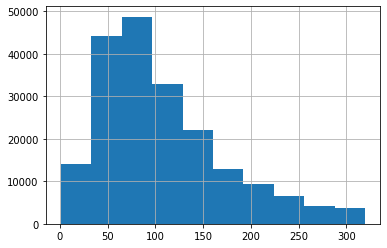

In [ ]:
df_final["price"].hist()

In [ ]:
mask = df_final["property_type"].map(df_final["property_type"].value_counts()< 3957) 
df_final["property_type"] =  df_final["property_type"].mask(mask, 'Other')

In [ ]:
mask = df_final["room_type"].map(df_final["room_type"].value_counts()) < 3000
df_final["room_type"] =  df_final["room_type"].mask(mask, 'Other')


In [ ]:
df_final.to_csv('df_final.csv',index=False)
!cp df_final.csv "drive/My Drive/DSMLBC10_FINAL/"

In [ ]:
binary_cols = [col for col in df_final.columns if df_final[col].dtypes == "O" and len(df_final[col].unique()) == 2]

In [ ]:
binary_cols

['instant_bookable', 'bathrooms_type']

In [ ]:
def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe
    
for col in binary_cols:
    label_encoder(df_final, col)

In [ ]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

df_final = one_hot_encoder(df_final, cat_cols, drop_first=True)

In [ ]:
df_final.shape

(198873, 65)

In [ ]:
len(df_final.columns)

65

In [ ]:
df_final.dtypes

host_response_rate                     float64
host_acceptance_rate                   float64
host_listings_count                    float64
host_total_listings_count              float64
latitude                               float64
longitude                              float64
accommodates                             int64
bathrooms                              float64
bedrooms                               float64
beds                                   float64
price                                  float64
minimum_nights_avg_ntm                 float64
maximum_nights_avg_ntm                 float64
availability_30                          int64
availability_60                          int64
availability_90                          int64
availability_365                         int64
number_of_reviews                        int64
number_of_reviews_ltm                    int64
review_scores_rating                   float64
review_scores_accuracy                 float64
review_scores

# Final Model

In [ ]:
y = df_final["price"]
X = df_final.drop(["price"], axis=1) 

In [ ]:
X = X.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

In [ ]:
lgbm = LGBMRegressor(random_state=42)
catboost = CatBoostRegressor(random_state=42)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=42)

In [ ]:
lgbm = LGBMRegressor(random_state=42).fit(X_train, y_train)
#catboost = CatBoostRegressor(random_state=42).fit(X_train, y_train)

In [ ]:
y_pred = lgbm.predict(X_test)
#y_pred = catboost.predict(X_test)

In [ ]:
print("R2:",r2_score(y_test, y_pred))
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred)))

R2: 0.6388188888291598
RMSE: 39.34622831569404


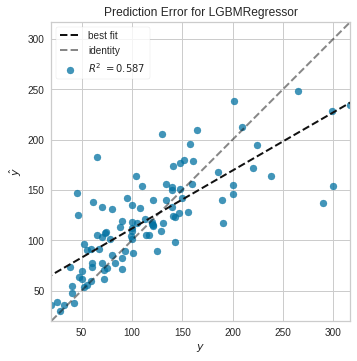

In [ ]:
from yellowbrick.regressor import PredictionError

def error_graph(n=100):
    visualizer = PredictionError(lgbm)
    visualizer.fit(X_train[0:n], y_train[0:n])  # Fit the training data to the visualizer
    visualizer.score(X_test[0:n], y_test[0:n])  # Evaluate the model on the test data
    visualizer.show()  

error_graph()      

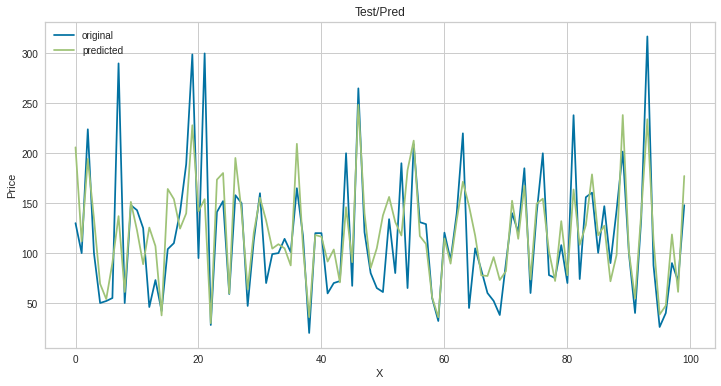

In [ ]:
def line_graph(n=100):
    x_ax = range(len(y_test[0:n])) 
    plt.figure(figsize=(12, 6)) 
    plt.plot(x_ax, y_test[0:n], label="original") 
    plt.plot(x_ax, y_pred[0:n], label="predicted") 
    plt.title("Test/Pred") 
    plt.xlabel('X') 
    plt.ylabel('Price') 
    plt.legend(loc='best',fancybox=True, shadow=True) 
    plt.grid(True) 
    plt.show()

line_graph()

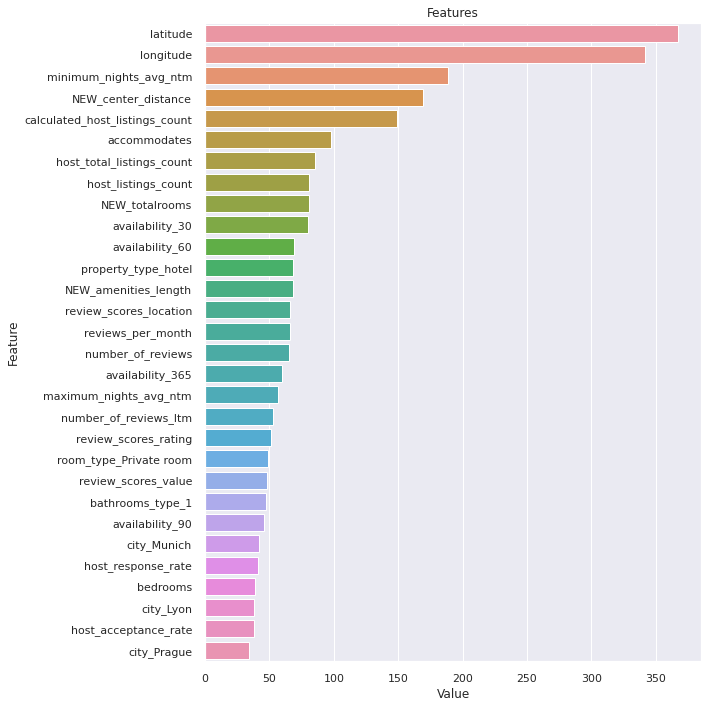

In [ ]:
def plot_importance(model, features, num=30, save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                      ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')


plot_importance(lgbm, X_train)

# Optuna

In [ ]:
pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import optuna

In [ ]:
import sklearn.datasets
import sklearn.ensemble
import sklearn.model_selection

def objective():

    lgbm = LGBMRegressor(random_state=42) 
    
    return sklearn.model_selection.cross_val_score(lgbm, X_train, y_train, n_jobs=-1, cv=3, scoring="r2").mean(), sklearn.model_selection.cross_val_score(lgbm, X_train, y_train, n_jobs=-1, cv=3, scoring="neg_root_mean_squared_error").mean()

r2,rmse = objective() 
print(f"R2: {r2}, RMSE: {abs(rmse)}")

In [ ]:
def objective(trial):
    param = {
      'boosting_type': 'dart',
      'metric': 'rmse',
      'learning_rate': 0.2,
      'random_state': 42,
      'num_leaves': trial.suggest_int('num_leaves', 100, 512),
      'n_estimators': trial.suggest_int('n_estimators', 500, 1000),
      'max_depth': trial.suggest_int('max_depth', 6, 10),
      'subsample': trial.suggest_categorical('subsample', [0.4,0.5,0.6,0.7,0.8,1.0]),
      'max_bin': trial.suggest_int('max_bin', 255, 500),
      }

    model = LGBMRegressor(**param)  
    
    model.fit(X_train, y_train)
    
    preds = model.predict(X_test)
    
    rmse = mean_squared_error(y_test, preds, squared=False)
    
    return rmse

In [ ]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50, n_jobs=-1)
print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)

[I 2023-01-10 18:47:46,768] A new study created in memory with name: no-name-b4223735-c404-4a97-ad58-f2ce00fd287f
[I 2023-01-10 19:00:06,060] Trial 1 finished with value: 36.72507536379864 and parameters: {'num_leaves': 279, 'n_estimators': 715, 'max_depth': 7, 'subsample': 0.8, 'max_bin': 334}. Best is trial 1 with value: 36.72507536379864.
[I 2023-01-10 19:12:14,149] Trial 2 finished with value: 36.40907305756961 and parameters: {'num_leaves': 269, 'n_estimators': 628, 'max_depth': 8, 'subsample': 0.5, 'max_bin': 371}. Best is trial 2 with value: 36.40907305756961.
[I 2023-01-10 19:14:24,514] Trial 0 finished with value: 35.705033305018375 and parameters: {'num_leaves': 402, 'n_estimators': 909, 'max_depth': 10, 'subsample': 1.0, 'max_bin': 486}. Best is trial 0 with value: 35.705033305018375.
[I 2023-01-10 19:25:08,227] Trial 4 finished with value: 36.69841327806791 and parameters: {'num_leaves': 167, 'n_estimators': 692, 'max_depth': 7, 'subsample': 0.4, 'max_bin': 268}. Best is tr

# Randomized Search

In [ ]:
#grid of parameters
parameters = {
    'learning_rate': [0.2, 0.25, 0.3, 0.5,0.6],
    'subsample'    : [0.5,0.6,0.7,0.8,0.9],
    'n_estimators' : [50,100,200,300,400,500],
    'max_depth'    : [4,5,6,7,8,9,10,11],
    'scoring' :['r2','neg_mean_absolute_error']
    }

In [ ]:
model = LGBMRegressor()

In [ ]:
randm_src =  RandomizedSearchCV(estimator=model, param_distributions = parameters,
                               cv = 3, n_iter = 200, n_jobs=-1)
randm_src.fit(X_train, y_train)

print(" Results from Random Search " )
print("\n The best estimator across ALL searched params:\n", randm_src.best_estimator_)
print("\n The best score across ALL searched params:\n", randm_src.best_score_)
print("\n The best parameters across ALL searched params:\n", randm_src.best_params_)

In [ ]:
y_pred = randm_src.predict(X_test)

In [ ]:
print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred,squared=False))

# Grid Search

In [ ]:
lgbm.get_params_

In [ ]:
lgbm = LGBMRegressor()

In [ ]:
lgbm_params = {'learning_rate': [0.08,0.1,0.2,0.3], 'max_depth': [8,10,12], 'n_estimators': range(700,900,50)[700,750,800], 'scoring': ['r2_score'], 'subsample': [0.5,0.6]}
lgbm_best_grid = GridSearchCV(lgbm, params, cv=5 ,n_jobs=-1, verbose=3, scoring="r2").fit(X_train,y_train)

In [ ]:
lgbm_params = {'learning_rate': [0.1, 0.15, 0.2, 0.25, 0.3], 'max_depth': range(8,12,1), 'n_estimators': range(700,900,50), 'scoring': ['r2_score'], 'subsample': [0.5, 0.52, 0.54, 0.56, 0.58, 0.6]}
lgbm_best_grid = GridSearchCV(lgbm, lgbm_params, cv=5 ,n_jobs=-1, verbose=3, scoring="r2").fit(X_train,y_train)

Fitting 5 folds for each of 480 candidates, totalling 2400 fits
[LightGBM] [Warning] Unknown parameter: scoring


In [ ]:
lgbm_best_grid.best_params_

{'learning_rate': 0.15,
 'max_depth': 10,
 'n_estimators': 850,
 'scoring': 'r2_score',
 'subsample': 0.5}

In [ ]:
lgbm_final = lgbm.set_params(**lgbm_best_grid.best_params_, random_state=42).fit(X_train, y_train)

In [ ]:
cv_results = cross_validate(lgbm_final, X_train, y_train, cv=5, scoring=["r2", "neg_root_mean_squared_error"])

[LightGBM] [Warning] Unknown parameter: scoring
[LightGBM] [Warning] Unknown parameter: scoring
[LightGBM] [Warning] Unknown parameter: scoring
[LightGBM] [Warning] Unknown parameter: scoring


In [ ]:
print(cv_results['test_r2'].mean())
print(cv_results['test_neg_root_mean_squared_error'].mean())

0.679267524983612
-0.3535472957188778


In [ ]:
y_pred = lgbm_final.predict(X_test)
y_pred = np.expm1(y_pred)

y_test = np.expm1(y_test)

In [ ]:
print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred, squared=False))

nan
inf


c:\Users\Cagkan\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:805: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0, dtype=np.float64)
c:\Users\Cagkan\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:807: RuntimeWarning: overflow encountered in square
  weight * (y_true - np.average(y_true, axis=0, weights=sample_weight)) ** 2
c:\Users\Cagkan\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:813: RuntimeWarning: invalid value encountered in true_divide
  output_scores[valid_score] = 1 - (numerator[valid_score] / denominator[valid_score])
c:\Users\Cagkan\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:442: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0, weights=sample_weight)


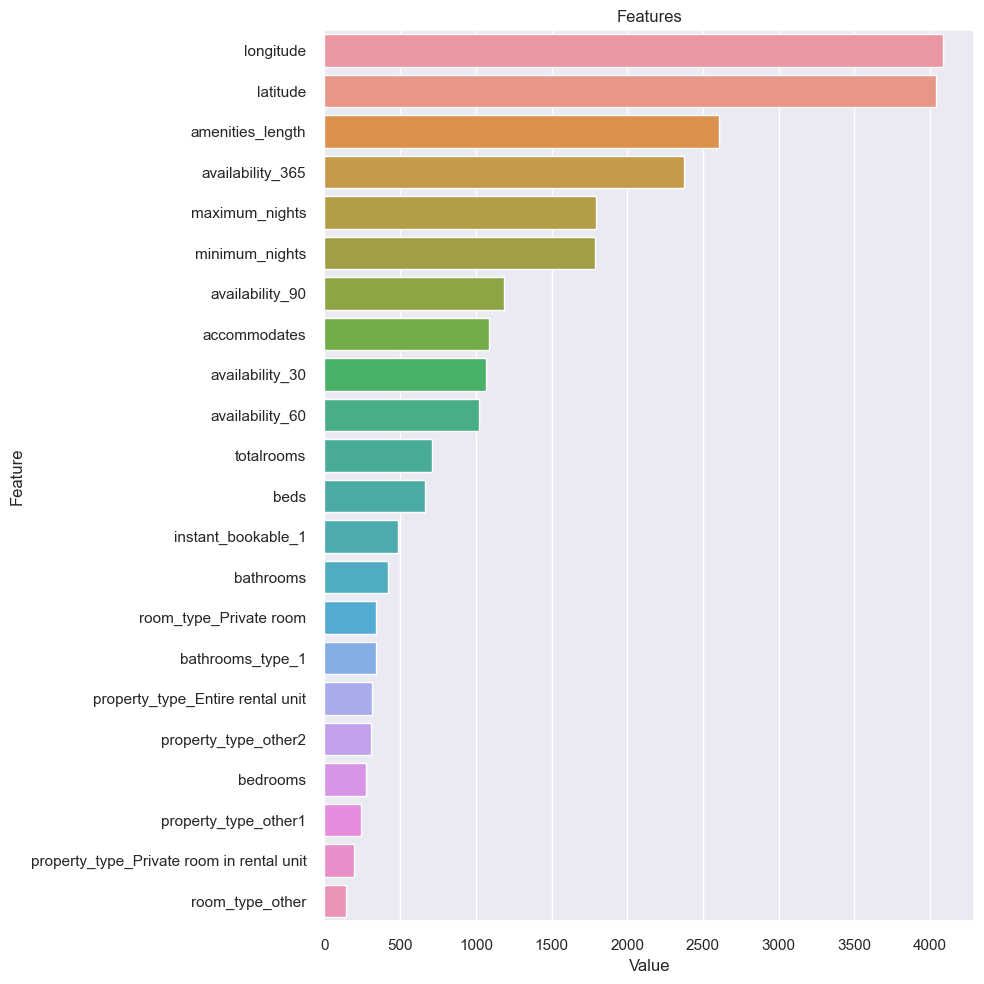

In [ ]:
def plot_importance(model, features, num=30, save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                      ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')


plot_importance(lgbm_final, X_train)

# Final Model with Best Hyperparameters

In [ ]:
best_params = {'boosting_type': 'dart', 'metric': 'rmse', 'learning_rate': 0.2, 'random_state': 42,'num_leaves': 233, 'n_estimators': 999, 'max_depth': 10, 'subsample': 0.4, 'max_bin': 448}
lgb_ = LGBMRegressor(**best_params).fit(X_train, y_train)

In [ ]:
pred = lgb_.predict(X_test)

In [ ]:
print(r2_score(y_test, pred))
print(mean_squared_error(y_test, pred,squared=False))

0.7079612491626623
35.380244831078855


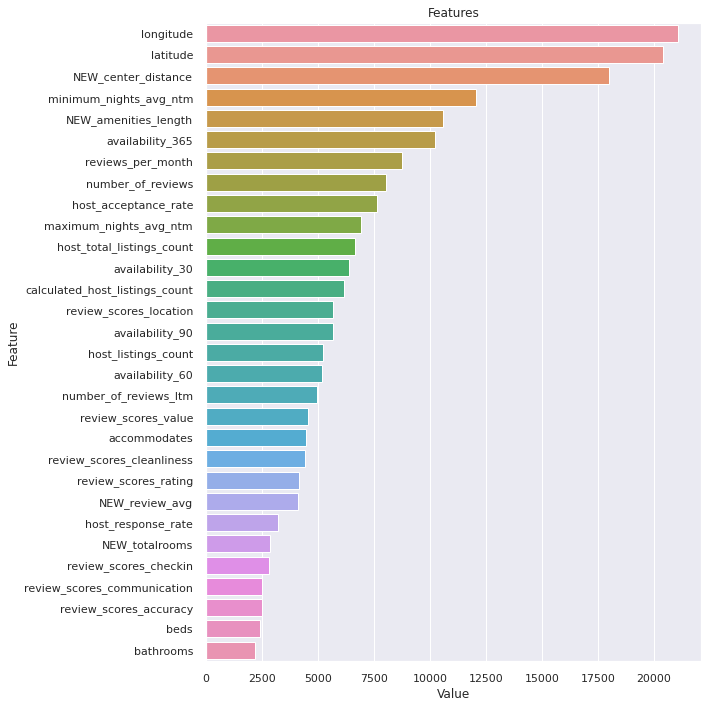

In [ ]:
def plot_importance(model, features, num=30, save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                      ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')


plot_importance(lgb_, X_train)

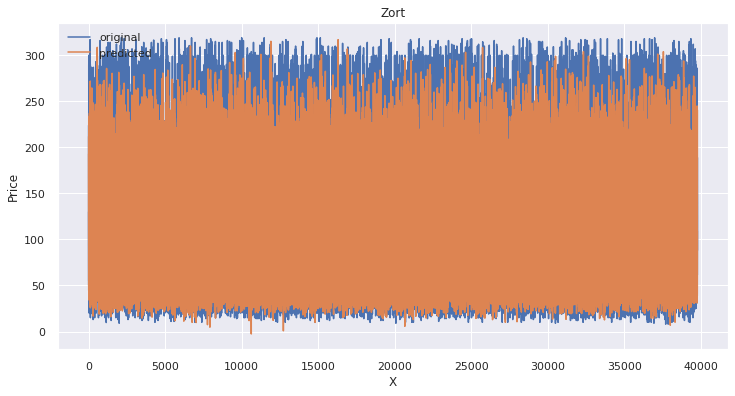

In [ ]:
x_ax = range(len(y_test)) 
plt.figure(figsize=(12, 6)) 
plt.plot(x_ax, y_test, label="original") 
plt.plot(x_ax, pred, label="predicted") 
plt.title("Zort") 
plt.xlabel('X') 
plt.ylabel('Price') 
plt.legend(loc='best',fancybox=True, shadow=True) 
plt.grid(True) 
plt.show()

In [ ]:
results_df = pd.DataFrame({"Actual": y_test, "Predicted": y_pred }).reset_index(drop=True)

In [ ]:
results_df["Error"] = results_df["Actual"] - results_df["Predicted"]

In [ ]:
results_df["Percent_Error"] = abs(results_df["Error"]) * 100  / results_df["Actual"]

In [ ]:
results_df.sort_values(by="Actual").head()

,Actual,Predicted,Error,Percent_Error
37866,8.000,31.095,-23.095,288.693
37705,8.000,34.165,-26.165,327.063
20076,8.992,16.670,-7.678,85.385
30501,9.000,17.046,-8.046,89.398
36937,9.000,86.276,-77.276,858.617


In [ ]:
results_df.sort_values(by="Error",ascending=False).head(50)

,Actual,Predicted,Error,Percent_Error
7027,293.621,32.094,261.527,89.069
4520,313.000,76.318,236.682,75.617
28158,300.000,65.517,234.483,78.161
31802,299.000,65.904,233.096,77.958
3316,290.000,57.383,232.617,80.213
8797,300.000,69.088,230.912,76.971
1083,299.000,71.925,227.075,75.945
25684,300.000,74.887,225.113,75.038
11197,300.000,75.637,224.363,74.788
18676,300.000,75.671,224.329,74.776


In [ ]:
bins = [0, 50, 100, 150, 200, 250, 320]
category = ['0-50', '50-100', '100-150', "150-200", "200-250", "250-320"]
results_df['fiyat'] = pd.cut(results_df['Actual'], bins, labels = category)

In [ ]:
results_df.groupby("fiyat").agg({"Predicted":["count","mean","min","max"],
                                 "Error":["mean","min","max"],
                                 "Percent_Error":["mean","min","max"]})

Predicted                          Error                  Percent_Error               
            count    mean    min     max    mean      min     max          mean   min      max
fiyat                                                                                         
0-50         7939  53.752  7.854 229.171 -17.391 -213.171  33.144        60.735 0.026 1587.747
50-100      15042  90.439 17.111 243.236 -14.057 -160.201  82.889        29.710 0.000  243.993
100-150      8434 126.728 28.631 263.697  -1.905 -144.697 110.321        20.174 0.001  121.594
150-200      4359 154.031 21.532 277.267  21.609 -107.267 178.468        18.654 0.003   89.234
200-250      2253 176.695 48.325 284.874  49.274  -59.006 196.794        22.888 0.003   78.718
250-320      1748 191.861 32.094 304.453  90.423  -26.190 261.527        31.808 0.460   89.069

In [ ]:
plt.scatter(results_df["Actual"][0:100], results_df["Error"][0:100])
plt.show()

In [ ]:
plt.scatter(results_df["Actual"], results_df["Error"])
plt.show()

# Dumping the Model

In [ ]:
import pickle

In [ ]:
with open("model.pkl", 'wb') as f:
    pickle.dump(lgb_, f)